# Using Environmental Variable and Plot Numerical Data

In [2]:
import os
import pandas as pd

In [3]:
PUIdata = os.getenv('DFDATA')
print (PUIdata)

/gws/open/NYCOpenData/nycopendata/data


In [4]:
path = PUIdata + '/erm2-nwe9/1452906401/erm2-nwe9'
print(path)

/gws/open/NYCOpenData/nycopendata/data/erm2-nwe9/1452906401/erm2-nwe9


## Read and Inspect Top 10 Rows

In [5]:
df = pd.read_csv(path)

df.head(10)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32421541,01/15/2016 02:53:53 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,10472,1045 BOYNTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.824954,-73.877382,"(40.82495417728639, -73.8773815809183)"
1,32419624,01/15/2016 02:13:05 AM,NaN,DOT,Department of Transportation,Street Condition,Defective Hardware,Street,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760993,-73.990759,"(40.7609926858091, -73.99075902845719)"
2,32414962,01/15/2016 02:10:42 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Food Preparation Location,Restaurant/Bar/Deli/Bakery,10075,402 EAST 78 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.771496,-73.952824,"(40.771495757295604, -73.95282389647284)"
3,32414635,01/15/2016 02:08:18 AM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,Non-Delivery Goods/Services,NaN,10005,30 WALL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706839,-74.010218,"(40.706838610354374, -74.01021812672232)"
4,32419216,01/15/2016 02:08:08 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10009,85 AVENUE A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725173,-73.984191,"(40.725172979155765, -73.98419055772301)"
5,32421270,01/15/2016 02:02:48 AM,01/15/2016 05:21:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11215,367 7 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669833,-73.984132,"(40.66983297588848, -73.98413157857767)"
6,32416099,01/15/2016 01:57:03 AM,01/15/2016 03:21:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219,902 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635093,-74.005837,"(40.63509321529507, -74.0058367696857)"
7,32416803,01/15/2016 01:56:27 AM,01/15/2016 04:27:39 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10468,2101 CEDAR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.860224,-73.913829,"(40.86022374643802, -73.91382949845207)"
8,32415752,01/15/2016 01:52:12 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Public Garden,10453,1974 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852221,-73.910760,"(40.85222060526577, -73.91076013613542)"
9,32416765,01/15/2016 01:50:44 AM,01/15/2016 02:14:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Store/Commercial,10002,120 ORCHARD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.719541,-73.989495,"(40.719541341328174, -73.98949493251553)"


In [9]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

## Keep Only Numberical Variables

In [25]:
keepCol=['X Coordinate (State Plane)', 'Y Coordinate (State Plane)']
dfNumerical = df[keepCol]
dfNumerical.columns = ['X', 'Y']

In [26]:
dfNumerical.head(10)

,X,Y
0,1018186.0,239854.0
1,986810.0,216527.0
2,997317.0,220357.0
3,981417.0,196797.0
4,988632.0,203477.0
5,988652.0,183315.0
6,982630.0,170658.0
7,1008086.0,252692.0
8,1008938.0,249777.0
9,987162.0,201425.0


## Plot the Numerical Variables with Basic Styling

In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

(array([  900000.,   920000.,   940000.,   960000.,   980000.,  1000000.,
         1020000.,  1040000.,  1060000.,  1080000.]),
 <a list of 10 Text xticklabel objects>)

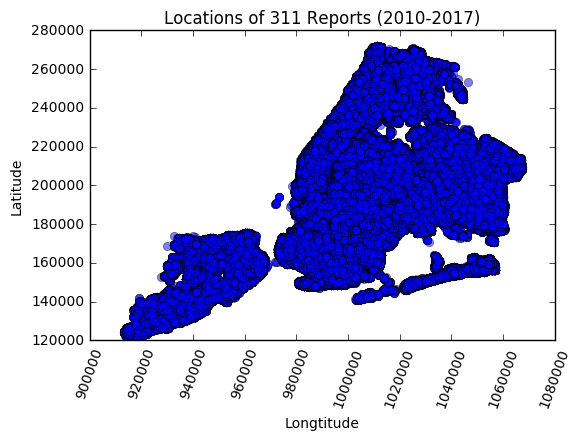

In [38]:
plt.plot(dfNumerical[dfNumerical.X > 0]['X'], dfNumerical[dfNumerical.Y > 0]['Y'], 'o', alpha=.5)
plt.title("Locations of 311 Reports (2010-2017)")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.xticks(rotation=70)